In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [3]:
dates=pd.date_range(start='2025-07-01', periods=30, freq='D')

In [4]:
date={
    "Date":np.tile(dates,len(apartments)),
    "Appartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}
                                         
                           

In [5]:
df=pd.DataFrame(date)

In [6]:
df

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,27.262968
1,2025-07-02,Apt_1,9.707738
2,2025-07-03,Apt_1,17.397916
3,2025-07-04,Apt_1,18.677627
4,2025-07-05,Apt_1,22.621408
...,...,...,...
595,2025-07-26,Apt_20,21.057502
596,2025-07-27,Apt_20,28.875531
597,2025-07-28,Apt_20,21.250356
598,2025-07-29,Apt_20,31.668408


In [7]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)
df

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,27.26
1,2025-07-02,Apt_1,9.71
2,2025-07-03,Apt_1,17.40
3,2025-07-04,Apt_1,18.68
4,2025-07-05,Apt_1,22.62
...,...,...,...
595,2025-07-26,Apt_20,21.06
596,2025-07-27,Apt_20,28.88
597,2025-07-28,Apt_20,21.25
598,2025-07-29,Apt_20,31.67


In [8]:
df.isnull().sum()

Date                 0
Appartment           0
Electricity_usage    0
dtype: int64

In [9]:
df.dtypes

Date                 datetime64[ns]
Appartment                   object
Electricity_usage           float64
dtype: object

In [10]:
df.head()

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,27.26
1,2025-07-02,Apt_1,9.71
2,2025-07-03,Apt_1,17.40
3,2025-07-04,Apt_1,18.68
4,2025-07-05,Apt_1,22.62


In [11]:
df.tail()

,Date,Appartment,Electricity_usage
595,2025-07-26,Apt_20,21.06
596,2025-07-27,Apt_20,28.88
597,2025-07-28,Apt_20,21.25
598,2025-07-29,Apt_20,31.67
599,2025-07-30,Apt_20,16.75


In [12]:
df.shape

(600, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Appartment         600 non-null    object        
 2   Electricity_usage  600 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.2+ KB


In [14]:
usage_per_apartment=df.groupby("Appartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Appartment
Apt_4     634.65
Apt_1     630.76
Apt_7     617.95
Apt_19    615.41
Apt_10    607.28
Apt_6     606.18
Apt_20    603.96
Apt_17    601.94
Apt_5     600.96
Apt_9     599.18
Apt_14    599.12
Apt_3     597.74
Apt_16    596.58
Apt_18    595.81
Apt_13    584.21
Apt_11    571.52
Apt_12    564.01
Apt_15    563.63
Apt_8     555.62
Apt_2     538.25
Name: Electricity_usage, dtype: float64


In [15]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    19.5175
2025-07-02    19.1165
2025-07-03    19.9335
2025-07-04    18.7305
2025-07-05    18.1980
Name: Electricity_usage, dtype: float64


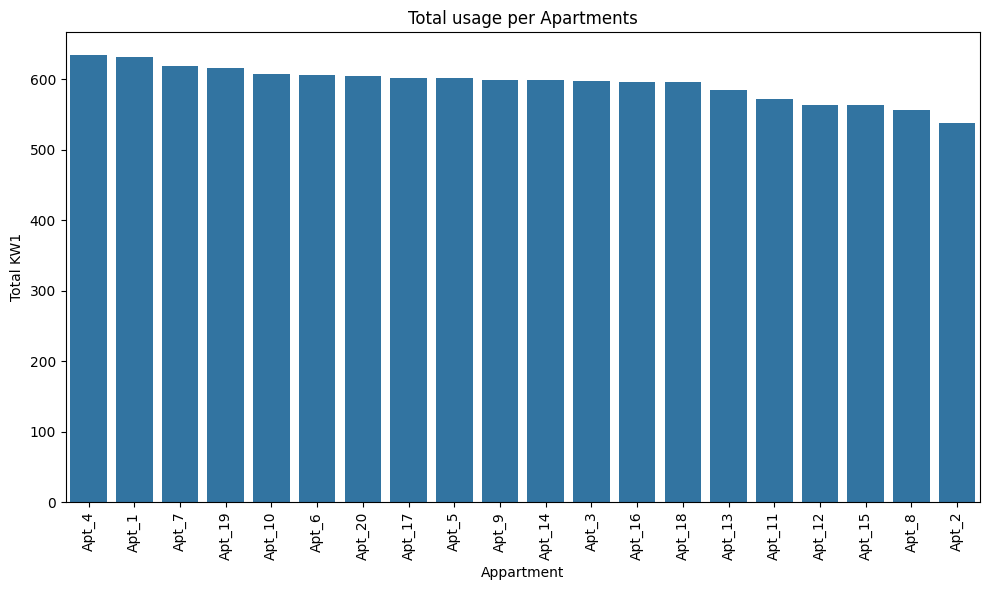

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

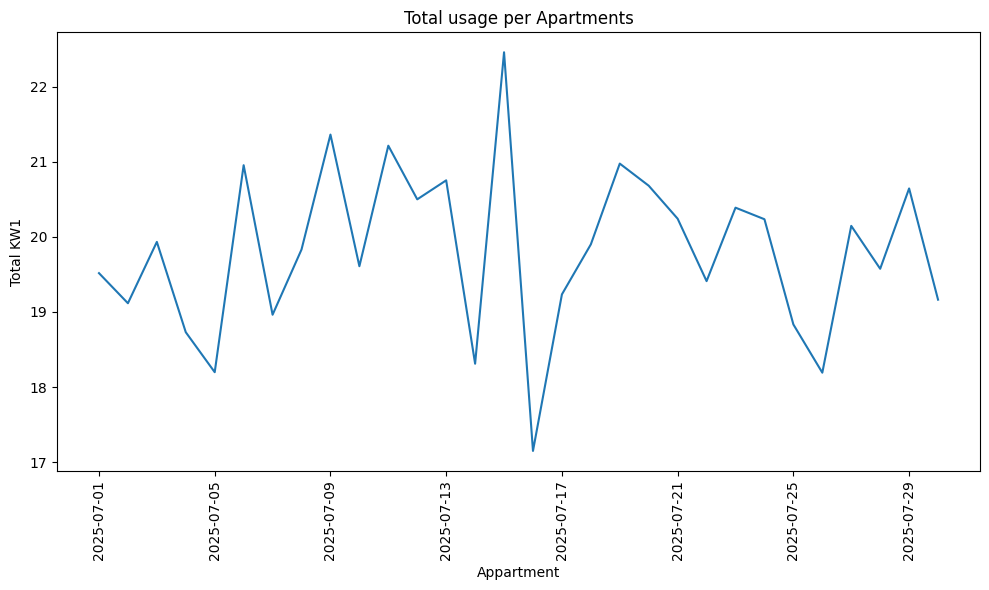

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

In [18]:
thresholds=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"] > thresholds
print(df[df["High_usage_flag"] == True].head())

          Date Appartment  Electricity_usage  High_usage_flag
17  2025-07-18      Apt_1              31.56             True
95  2025-07-06      Apt_4              36.67             True
138 2025-07-19      Apt_5              33.23             True
142 2025-07-23      Apt_5              30.65             True
190 2025-07-11      Apt_7              30.98             True
